# CSCI 3202, Spring 2020: Practicum

---


This practicum is due on Moodle by **11:59 PM on Friday May 1 2020**.  Your solutions to theoretical questions should be done in Markdown/LateX directly below the associated question. Your solutions to computational questions should include any relevant Python code, as well as results and any written commentary.

**The rules:**

1. All work, code and analysis must be **your own**.
1. You may use your course notes, posted lecture slides, textbook, in-class notebooks and homework solutions as resources.  You may also search online for answers to general knowledge questions, like the form of a probability distribution function, or how to perform a particular operation in Python.
1. You may **not** post to message boards or other online resources asking for help.
1. **You may not collaborate with classmates or anyone else.**
1. This is meant to be like a coding portion of your final exam. So, I will be much less helpful than I typically am with homework. For example, I will not check answers, help debug your code, and so on.
1. If you have a question, post it first as a **private** Piazza message. If I decide that it is appropriate for the entire class, then I will make it a public post (and anonymous).
1. If something is left open-ended, it is probably because I intend for you to code it up however you want, and only care about the plots/analysis I see at the end. Feel free to ask clarifying questions though.

Violation of these rules will result in an **F** and a trip to the Honor Code council.

---
**By writing your name below, you agree to abide by these rules:**

**Your name:** Alex Book

---


In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict

# added packages
import heapq
from matplotlib import colors

from pprint import pprint

---
## [50 pts] Problem 1:  Route-finding

Consider the map of the area to the west of the Engineering Center given below, with a fairly coarse Cartesian grid superimposed.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/engineering_center_grid_zoom.png" style="width: 800px;"/>

The green square at $(x,y)=(1,15)$ is the starting location, and you would like to walk from there to the yellow square at $(25,9)$ with the **shortest total path length**. The filled-in blue squares are obstacles, and you cannot walk through those locations.  You also cannot walk outside of this grid.

Legal moves in the North/South/East/West directions have a step cost of 1. Moves in the diagonal direction (for example, from $(1,15)$ to $(2,14)$) are allowed, but they have a step cost of $\sqrt{2}$. 

Of course, you can probably do this problem (and likely have to some degree, in your head) without a search algorithm. But that will hopefully provide a useful "sanity check" for your answer.

#### Part A
Write a function `adjacent_states(state)`:
* takes a single argument `state`, which is a tuple representing a valid state in this state space
* returns in some form the states reachable from `state` and the step costs. How exactly you do this is up to you.

Print to the screen the output for `adjacent_states((1,15))`.

In [2]:
grid = np.array([[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
                 [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
                 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
                 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

# grid2 = np.flipud(grid)
# print(grid2)

In [3]:
def flip_coords(loc):
    i, j = loc
    return (j,i)

def adjacent_states(state):
    i, j = state
    def check_neighbor(a, b):
        if a < 1 or b < 1 or a > 25 or b > 16 or grid[b-1][a-1] == 1:
            return False
        else:
            return True
    ans = []
    neighbors = [[(i, j+1), 1],
                 [(i+1, j+1), np.sqrt(2)],
                 [(i+1, j), 1],
                 [(i+1, j-1), np.sqrt(2)],
                 [(i, j-1), 1],
                 [(i-1, j-1), np.sqrt(2)],
                 [(i-1, j), 1],
                 [(i-1, j+1), np.sqrt(2)]]
    
    for n in neighbors:
        if check_neighbor(n[0][0], n[0][1]):
            ans.append(n)
        
    return ans

pprint(adjacent_states((1,15)))

[[(1, 16), 1],
 [(2, 16), 1.4142135623730951],
 [(2, 15), 1],
 [(2, 14), 1.4142135623730951]]


#### Part B
Three candidate heuristic functions might be:
1. `heuristic_cols(state, goal)` = number of columns between the argument `state` and the `goal`
1. `heuristic_rows(state, goal)` = number of rows between the argument `state` and the `goal`
1. `heuristic_eucl(state, goal)` = Euclidean distance between the argument `state` and the `goal`

Write a function `heuristic_max(state, goal)` that returns the maximum of all three of these heuristic functions for a given `state` and `goal`.

In [4]:
def heuristic_cols(state, goal):
    return abs(state[0] - goal[0])

def heuristic_rows(state, goal):
    return abs(state[1] - goal[1])

def heuristic_eucl(state, goal):
    a, b = state
    x, y = goal
    return np.sqrt((x-a)**2 + (y-b)**2)

def heuristic_max(state, goal):
    return max(heuristic_cols(state, goal), 
               heuristic_rows(state, goal), 
               heuristic_eucl(state, goal))

#### Part C
Is the Manhattan distance an admissible heuristic function for this problem?  Explain why or why not.

Manhattan distance is not an admissible heuristic because it can overestimate the cost of reaching the goal state. For example, say we're starting at (1,1) and trying to get to (2,2). The Manhattan distance gives a distance (cost) of 2, while the true distance (cost) is $\sqrt{2}$ (moving diagonally instead of two separate linear moves).

#### Part D
Use A\* search and the `heuristic_max` heuristic to find the shortest path from the initial state at $(1,15)$ to the goal state at $(25,9)$. Your search **should not** build up the entire state space graph in memory. Instead, use the `adjacent_states` function from Part A, similarly to the 8-tile problem from Homework 3.

In [5]:
class Frontier_PQ:
    ''' frontier class for uniform search, ordered by path cost '''
    
    def __init__(self, start, cost):
        self.states = {}
        self.q = []
        self.add(start, cost)
        
    def add(self, state, cost):
        ''' push the new state and cost to get there onto the heap'''
        heapq.heappush(self.q, (cost, state))
        self.states[state] = cost

    def pop(self):
        (cost, state) = heapq.heappop(self.q)  # get cost of getting to explored state
        self.states.pop(state)    # and remove from frontier
        return (cost, state)

    def replace(self, state, cost):
        ''' found a cheaper route to `state`, replacing old cost with new `cost` '''
        self.states[state] = cost
        for i, (oldcost, oldstate) in enumerate(self.q):
            if oldstate==state and oldcost > cost:
                self.q[i] = (cost, state)
                heapq._siftdown(self.q, 0, i) # now i is posisbly out of order; restore
        return

def path(previous, s): 
    if s is None:
        return []
    else:
        return path(previous, previous[s])+[s]

def pathcost(path, step_costs):
    cost = 0
    if len(path) == 0:
        return cost
    else:
        for s in range(len(path)-1):
            cost += step_costs(path[s], path[s+1])
        return cost
    
def astar_search(start, goal, heuristic):
    frontier = Frontier_PQ(start, 0)
    explored = {}
    prev = {start : None}
    
    while frontier.q:
        cost, curr = frontier.pop()
        explored[curr] = pathcost(path(prev, curr), heuristic)
        if curr == goal:
            return path(prev, curr), explored[curr]
        for adj in adjacent_states(curr):
            adj_node = adj[0]
            cost_curr_to_adj = adj[1]
            newcost = explored[curr] + cost_curr_to_adj + heuristic(adj_node, goal)
            if (adj_node not in explored) and (adj_node not in frontier.states):
                frontier.add(adj_node, newcost)
                prev[adj_node] = curr
                
answer = astar_search((1,15), (25,9), heuristic_max)
pprint(answer)

([(1, 15),
  (2, 15),
  (3, 15),
  (4, 15),
  (5, 15),
  (6, 15),
  (7, 15),
  (8, 15),
  (9, 15),
  (10, 15),
  (11, 15),
  (12, 15),
  (13, 15),
  (14, 15),
  (15, 14),
  (16, 13),
  (17, 13),
  (18, 12),
  (19, 12),
  (20, 11),
  (21, 10),
  (22, 10),
  (23, 10),
  (24, 9),
  (25, 9)],
 26.485281374238575)


#### Part E
Make a figure depicting the optimal route from the initial state to the goal, similarly to how you depicted the maze solution in Homework 2.

<Figure size 1800x1152 with 0 Axes>

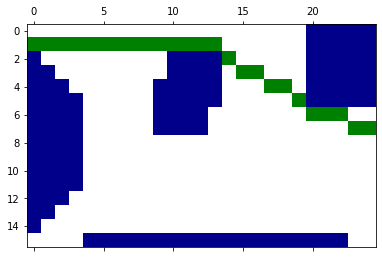

In [6]:
grid_ans = grid
tiles, final_cost = answer
for x in tiles:
    grid_ans[x[1]-1][x[0]-1] = 2

grid_ans=np.flipud(grid_ans)

cmap = colors.ListedColormap(['white', 'darkblue', 'green'])
plt.figure(figsize=(25,16))
plt.matshow(grid_ans, cmap=cmap)


---
## [50 pts] Problem 2:  Bayesian networks

#### Part A
In this problem, we are going to construct our own Bayesian Network. The probabilities are not given outright. You will use the data file mentioned below to determine the appropriate probability distributions for each node in the Bayes net. 

Suppose we are about to go on a run and are trying to decide how far to run. Consider the Bayesian network depicted below for this decision. The length of our run ($R$, miles) is continuous and depends on the temperature ($T$, degrees Fahrenheit), which is also a continuous variable, and whether or not it is raining ($P$), which is a discrete Boolean variable.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/running_bayesnet.png" style="width: 450px;"/>

1. Read in the data set [`data_running.csv`] from the Final Practicum Moodle folder. Read in the file as a pandas data frame.

Answer/Complete the following:
1. How many data points are there?
1. Make a histogram of the distribution of temperature, with appropriate axis labels.

There are 200 data points.


Text(0, 0.5, 'Occurences')

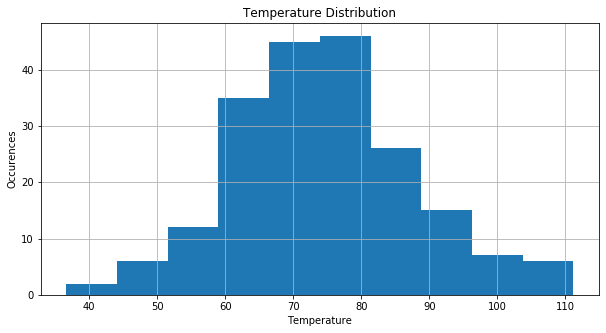

In [7]:
df = pd.read_csv('data_running.csv')
print('There are {} data points.'.format(len(df)))

fig, axes = plt.subplots(figsize=(10,5))
hist = df.hist(column='temperature', ax=axes)
axes.set_title('Temperature Distribution')
axes.set_xlabel('Temperature')
axes.set_ylabel('Occurences')

#### Part B

Using the data from the file in **Part A**, decide on appropriate prior distributions for $P$ and $T$.  Note that $P$ is discrete (Boolean), while $T$ is continuous.  

Further guidance on what I am asking:

So, for the distribution of $P$, you must determine P(P=True) and P(P=False). 

For T, study the histogram from **Part A**. Does the shape of the histogram remind you of any probability distribution you've seen before? We haven't seen a continuous probability distribution in class. However, the idea is the same as a discrete probability distribution. 

Continuous dsitributions you may or may not have encountered: Exponential, Uniform, Weibull, Normal, Chi-Squared, Logistic, Student-T, F. 

Choose a continuous distribution that fits $T$ and specify the appropriate parameters.


In [8]:
rain_counts = df['rain'].value_counts(normalize=True)
print('P(P=True) = {}'.format(rain_counts[1]))
print('P(P=False) = {}'.format(rain_counts[0]))

print('T can be represented by a normal distribution with a mean of {} and a standard deviation of {}.'.format(
    stats.norm.fit(df['temperature'])[0], stats.norm.fit(df['temperature'])[1]))

P(P=True) = 0.24
P(P=False) = 0.76
T can be represented by a normal distribution with a mean of 74.29234661280584 and a standard deviation of 13.456251867760999.


#### Part C

Make two scatter plots:  one of the relationship between temperature (x-axis) and run length (y-axis) for only the days when it was raining, and one of this relationship for only the days when it was not raining. Label your axes appropriately. All of this data is contained in the csv file that you read in for **Part A**.


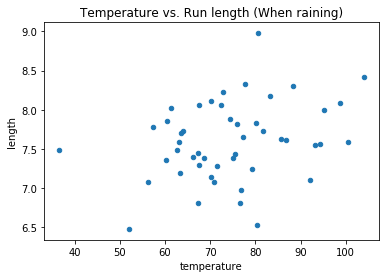

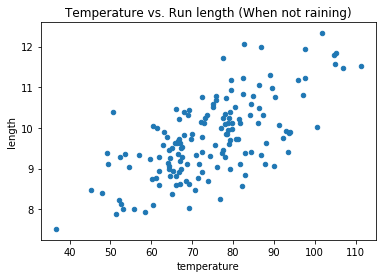

In [9]:
when_raining = df[df.rain == 'Yes']
when_not = df[df.rain == 'No']
y = when_raining.plot.scatter(x='temperature', y='length', title='Temperature vs. Run length (When raining)')
n = when_not.plot.scatter(x='temperature', y='length', title='Temperature vs. Run length (When not raining)')

#### Part D:

This part is done for you as we didn't explicitly talk about regression in this class. Regression is likely a concept you've encountered in previous classes, so please review what's done here and make sure you understand before proceeding.

Now, we need to specify the Conditional Probability table for Run length, R. Run length is necessarily non-negative, so we use a log-normal distribution as the conditional probability distribution for $R$, given $P$ and $T$. Let the log-normal parameter related to central tendency vary linearly with $T$, and categorically depending on whether or not it is raining. Keep the log-normal parameter related to distribution spread fixed. 

Lastly, we report the values of all relevant estimated parameters for the conditional probability distribution. 

In [10]:
dfRun = pd.read_csv('data_running.csv')

# We are doing a simple linear regression for log(R) = alpha + beta*T, 
# where different alpha and beta are estimated for +Rain and -Rain.

lr_no = stats.linregress(dfRun.loc[dfRun['rain']=='No','temperature'], np.log(dfRun.loc[dfRun['rain']=='No','length']))
lr_yes = stats.linregress(dfRun.loc[dfRun['rain']=='Yes','temperature'], np.log(dfRun.loc[dfRun['rain']=='Yes','length']))
alpha_no, beta_no = lr_no.intercept, lr_no.slope
alpha_yes, beta_yes = lr_yes.intercept, lr_yes.slope
sigma = np.std(np.log(dfRun['length']))

# report the parameter fits
print('Log-linear regression with no rain: intercept={:0.4f}, slope={:0.4f}'.format(alpha_no, beta_no))
print('Log-linear regression with rain: intercept={:0.4f}, slope={:0.4f}'.format(alpha_yes, beta_yes))
print('Estimate of spread, regardless of rain: {:0.4f}'.format(sigma))

Log-linear regression with no rain: intercept=1.9087, slope=0.0049
Log-linear regression with rain: intercept=1.9185, slope=0.0014
Estimate of spread, regardless of rain: 0.1396


#### Part E

The following code graphs out conditional probability distributions for R given a specific temperature and rain versus no rain. 

Specifically the graphs show the probability distributions for your run length on a day that is 80 degrees Fahrenheit and not raining, as well as run length on an 80-degree day when it is raining.  These two distributions are plotted on the same set of axes, with run length (miles) on the x-axis and probability density on the y-axis. 

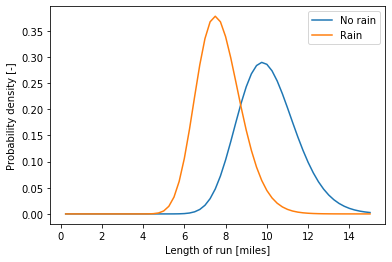

In [11]:
r = np.arange(0.25,15.25,0.25)
mu_no = alpha_no + beta_no*80
pdf_no = [stats.lognorm.pdf(x=rx, scale=np.exp(mu_no), s=sigma) for rx in r]
mu_yes = alpha_yes + beta_yes*80
pdf_yes = [stats.lognorm.pdf(x=rx, scale=np.exp(mu_yes), s=sigma) for rx in r]

plt.plot(r, pdf_no, label='No rain')
plt.plot(r, pdf_yes, label='Rain')
plt.xlabel('Length of run [miles]')
plt.ylabel('Probability density [-]')
plt.legend()
plt.show()

Given this, find the following:
- $P(R = 8 | P=T, Temp = 70)$
- $P(R = 8 | P=F, Temp = 70)$

Note: What's given about is an example of all of the probability values for R when the temperature is 80 degrees. Your task is to figure out how to compute the specific probabilities I've asked about.

In [12]:
# Your code here.
mu_no = alpha_no + beta_no*70
pdf_no = stats.lognorm.cdf(x=8, scale=np.exp(mu_no), s=sigma)
mu_yes = alpha_yes + beta_yes*70
pdf_yes = stats.lognorm.cdf(x=8, scale=np.exp(mu_yes), s=sigma)

print('P(R=8 | P=T, Temp=70): {}'.format(pdf_yes))
print('P(R=8 | P=F, Temp=70): {}'.format(pdf_no))

P(R=8 | P=T, Temp=70): 0.6664454099352031
P(R=8 | P=F, Temp=70): 0.10996237729192943


#### Part F

If you made it this far, we now have a working Bayesian Network with the CPTs specified!

Now we will get a chance to actually perform sampling from a Bayesian Network. I briefly talked about this in lecture, but I will walk you through the steps. It's a really cool way to use a Bayesian Network. Please read the comments in the code below and fill in where indicated. Specifically, look for the "# Your code here." comments.

We are going to estimate the probability of going on a run **at least** 8 miles in length. 

In [13]:
# We will be taking 10,000 random samples from our Bayesian Network.
n_iter = 10000

# The following line is specifying the threshold run length.
rlength = 8

# Select 10,000 random samples from P prior
# So that we all have the similar answers, set P(rain=True) = 0.3 and
# set P(rain=False) = 0.7
# Hint: you are sampling from a Boolean array with the specified 
# probabilities.
rain = stats.bernoulli.rvs(p=.3, size=n_iter) # Your code here.

# Select 10,000 random samples from T prior
avg, st_dev = stats.norm.fit(df['temperature'])
temp = stats.norm.rvs(scale=st_dev, size=n_iter, loc=avg) # Your code here.

# sample from R | P,T conditional distribution
# Done for you.
run_length = []
for k in range(n_iter):
    mu = alpha_yes + beta_yes*temp[k] if rain[k] else alpha_no + beta_no*temp[k]
    run_length.append(stats.lognorm.rvs(scale=np.exp(mu), s=sigma))

# Create a data frame with columns for rain, temp, and length. 
# The values from the rain column should be the random samples from above.
# The values from the temp column should be the random samples above.
# The values in the length column should be the run_length values from above.

dfSample = pd.DataFrame({'rain': rain, 'temperature': temp, 'length': run_length}) # Your code here.

# Using your dfSample dataframe, compute the probability of a run
# greater than or equal to 8 miles.

# Your code here.
print('Probability of a run greater than or equal to 8 miles: {}'.format(len(dfSample[dfSample.length >= 8])/n_iter))

Probability of a run greater than or equal to 8 miles: 0.7336
